In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Reading through the IMDB data to see what peoples feelings were towards movies
data = pd.read_csv('imdb_labelled.txt', delimiter = '\t', header = None)
data.columns = ['message', 'rating']

In [46]:
# Building my keyword list, the only issue that still remains is the capitalization one
keywords = ['best', 'good', 'awesome', 
            'love', 'loved', 'cool', 
            'enjoyed', 'enjoyable', 
            'favorite', 'gem']

for key in keywords:
    data[str(key)] = data.message.str.contains(
        ' ' + str(key) + ' ',
    )

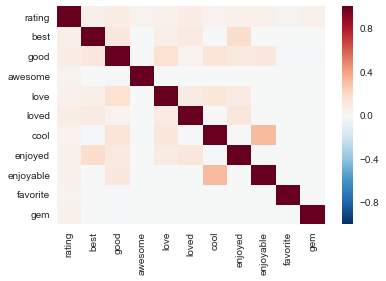

In [40]:
# Some decent correllation between 'cool' and 'enjoyable' but otherwise it's pretty low key.
sns.heatmap(data.corr())

In [41]:
# A quick look at what the dataframe looks like now that the features are in it
data.head(10)

,message,rating,best,good,awesome,love,loved,cool,enjoyed,enjoyable,favorite,gem
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,True,False,False,False,False,False,False,False,False,False
5,"The rest of the movie lacks art, charm, meanin...",0,False,False,False,False,False,False,False,False,False,False
6,Wasted two hours.,0,False,False,False,False,False,False,False,False,False,False
7,Saw the movie today and thought it was a good ...,1,False,True,False,False,False,False,False,False,False,False
8,A bit predictable.,0,False,False,False,False,False,False,False,False,False,False
9,Loved the casting of Jimmy Buffet as the scien...,1,False,False,False,False,False,False,False,False,False,False


In [42]:
trainer = data[keywords]
target = data['rating']

In [43]:
#Since my predictor variable is binary(1 or 0) I am using a Bernouli. I assume I'm using that correctly.
# If my predictor variable was a rating like (1, 2, 3, 4, 5) I assume I would use a multinomial distribution?
# And if it was a rating of (0-10) and floats were used it would be Gaussian?
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(trainer, target)

y_pred = bnb.predict(trainer)

print("Number of positive rated movies out of a total {} movies : {}".format(
    trainer.shape[0],
    (target != y_pred).sum()
))

Number of positive rated movies out of a total 748 movies : 340


In [11]:
# finding 340 out of the 386 positive reviews seems like a decent first attempt.
# I still think the capitalization issue would help solve some of the missing ones
data.rating.value_counts()

1    386
0    362
Name: rating, dtype: int64